# 6 Torchvision

Torchvision 是 PyTorch 的一个子库，专门用于处理计算机视觉任务。它提供了一系列预训练模型、数据集和图像处理工具，能够轻松地处理图像分类、目标检测、目标分割等任务。

适用场景：

1. **预训练模型**：TorchVision 提供了许多预训练模型，如 ResNet、VGG、Inception 等，以便可以直接使用这些模型进行迁移学习或微调。
2. **数据集**：TorchVision 提供了常见的计算机视觉数据集，如 CIFAR-10、CIFAR-100、ImageNet、COCO 等，方便直接加载和使用这些数据集进行模型训练和评估。
3. **图像处理工具**：TorchVision 提供了许多图像处理工具（如变换、裁剪、缩放、旋转等），帮助更轻松地进行数据预处理和数据增强。

## 1 数据读取

PyTorch 提供了一系列的工具来简化数据加载过程。

### 1.1 Dataset

`Dataset` 是一个抽象类，用于表示数据集。它为数据加载提供了统一的接口，使得我们可以方便地处理各种类型的数据。`Dataset` 类的主要功能是根据索引返回数据集中的特定样本，以及提供数据集的大小。要使用 `Dataset` 类，我们需要创建一个自定义类，继承自 `torch.utils.data.Dataset`，并实现 \_\_init\_\_， \_\_getitem\_\_ 和 \_\_len\_\_ 方法。

- **\_\_init\_\_**: 初始化数据集，构造函数的参数列表可以根据需求决定。自定义 Dataset 类的字段，在构造函数中初始化
- **\_\_getitem\_\_**: 返回指定索引的样本
- **\_\_len\_\_**: 返回数据集的大小


In [21]:
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, data_tensor, target_tensor):
        self.data_tensor = data_tensor
        self.target_tensor = target_tensor
    
    def __len__(self):
        return self.data_tensor.size(0)
    
    def __getitem__(self, idx):
        return self.data_tensor[idx], self.target_tensor[idx]

data = torch.randn(10, 3) # 尺寸为(10, 3) 的正态分布随机数
target = torch.randint(low=0, high=2, size=(data.size(0),)) # 0-2区间，尺寸为(10,)的随机数

my_dataset = MyDataset(data, target)

print('Dataset size: ', len(my_dataset))

print('tensor_data[0]: ', my_dataset[0])

Dataset size:  10
tensor_data[0]:  (tensor([ 0.4177, -0.1150,  0.5482]), tensor(1))



### 1.2 DataLoader

在 PyTorch 中，`DataLoader` 用于实现数据的批处理、打乱顺序和多线程加载等功能。它主要应用于深度学习训练和评估过程中的数据加载和预处理。

`DataLoader` 适用于以下场景：

1. **批处理**：将数据集分成多个小批次（mini-batch），有助于进行随机梯度下降（SGD）优化和减少内存占用。
2. **打乱顺序**：在训练过程中，打乱数据顺序可以提高模型的泛化能力。
3. **多线程加载**：使用多线程并行加载数据，可以加快数据处理速度，从而提高训练效率。

要创建一个 `DataLoader` 对象，需要执行以下步骤：

1. 导入 `torch.utils.data.DataLoader` 类。
2. 实例化一个 `DataLoader` 对象，传入数据集（`Dataset` 对象）、批次大小、是否打乱顺序和线程数等参数。


In [26]:
from torch.utils.data import DataLoader
my_dataloader = DataLoader(my_dataset, 
                           batch_size=2,   # 输出的 batch 大小
                           shuffle=True,   # 是否打乱
                           num_workers=0)  # 进程数

for d, t in my_dataloader:
    print(d, t)


tensor([[ 0.1993,  0.8732,  0.0370],
        [-0.8538,  0.7544,  1.0947]]) tensor([1, 1])
tensor([[-0.3344, -1.9384,  0.7469],
        [-0.7744,  0.4867,  0.2208]]) tensor([1, 0])
tensor([[-0.8169, -1.1779,  1.0112],
        [ 0.4177, -0.1150,  0.5482]]) tensor([1, 1])
tensor([[ 1.6894, -0.4389, -0.0231],
        [ 0.0550, -0.4800,  1.5111]]) tensor([0, 1])
tensor([[-0.6525, -2.0254, -1.8726],
        [-1.8940,  0.1676, -0.7569]]) tensor([0, 0])


## 2 用 Torchvision 读取数据

在 PyTorch 中，`torchvision` 提供了多种方法来读取和加载数据。以下是一些常见的方法及其适用场景：

1. **内置数据集**：
   TorchVision 提供了许多内置的计算机视觉数据集，如 CIFAR-10、CIFAR-100、ImageNet、MNIST、Fashion-MNIST 等。适用于直接加载和使用这些数据集进行模型训练和评估的场景。

2. **自定义数据集**：
   如果要加载自定义的数据集，可以通过继承 `torch.utils.data.Dataset` 类并实现 `__getitem__` 和 `__len__` 方法来创建自定义数据集。适用于加载非内置数据集的场景。

3. **图像文件夹数据集**：
   如果数据集以文件夹的形式组织，其中每个文件夹代表一个类别，可以使用 `torchvision.datasets.ImageFolder` 类直接加载数据。适用于以文件夹形式组织的图像数据集的场景。

4. **数据加载器**：
   使用 `torch.utils.data.DataLoader` 类将数据集分成多个批次，实现数据的批处理、打乱顺序和多线程加载。适用于深度学习训练和评估过程中的数据加载和预处理的场景。

根据数据集的不同组织形式，我们可以选择合适的方法来加载数据，并将其与 `DataLoader` 结合使用以提高模型训练和评估的效率。

### 2.1 内置数据集

在这里使用 MNIST 展示从内置数据集加载数据的例子。MNIST 数据集由于其简单的结构和相对较小的规模，被广泛用于深度学习和计算机视觉领域的入门学习、教学和基准测试。在 PyTorch 中，可以轻松地使用 `torchvision.datasets.MNIST` 类加载和使用 MNIST 数据集，从而进行各类模型的训练和评估。


In [41]:
import torchvision.datasets as datasets

mnist_dataset = datasets.MNIST(root='./data',
                                train=True,
                                transform=None,
                                target_transform=None,
                                download=True)

print(type(mnist_dataset))
print(len(mnist_dataset))

img, n = mnist_dataset[0]
display(img)
print("img label is: ", n)



<class 'torchvision.datasets.mnist.MNIST'>
60000


img label is:  5


### 2.2 图像文件夹数据集

如果数据集以文件夹的形式组织，其中每个文件夹代表一个类别，可以使用 torchvision.datasets.ImageFolder 类直接加载数据。适用于以文件夹形式组织的图像数据集的场景

In [ ]:
# 加载 ImageFolder 数据集
dataset = datasets.ImageFolder(root='./images', transform=None)

## 3 数据增强

在深度学习场景中，对输入图像进行适当的预处理和增强可以提高模型的性能和泛化能力。torchvision.transforms 是 PyTorch 生态系统中的一个子库，专门用于处理计算机视觉任务中的图像预处理和数据增强，提供了一系列有用的预处理和数据增强函数，可以轻松地对图像数据进行转换和操作。

### 3.1 图片与张量之间的转换

ToTensor() 和 ToImage() 分别用于将 PIL 图像（Python Imaging Library，即 PIL.Image.Image 类型）或 numpy.ndarray 转换为 PyTorch 中的张量（tensor），以及将张量转换回 PIL 图像。

#### ToTensor()

ToTensor() 用于将 PIL 图像或 numpy.ndarray 类型的图像数据转换为 PyTorch 张量。它会将输入的图像数据归一化到 [0, 1] 范围内，并对通道维度进行重排，输出的张量维度为 (C, H, W)。

In [1]:
import torchvision.transforms as transforms
from PIL import Image

img_pil = Image.open("./images/tyy.jpg")
img_tensor = transforms.ToTensor()(img_pil)
print(img_tensor.size())
# 输出：torch.Size([3, 225, 225])


torch.Size([3, 225, 225])


#### ToImage()

ToPILImage() 用于将 PyTorch 张量转换回 PIL 图像。它会将输入的张量数据反归一化到 [0, 255] 范围内，并对通道维度进行重排，输出的图像维度为 (H, W, C)。它有一个可选参数 mode，用于指定输出图像的模式（如 'RGB', 'RGBA', 'L' 等）。


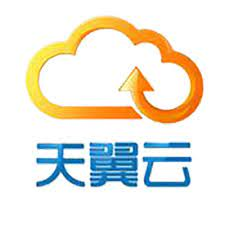

In [3]:
import torchvision.transforms as transforms

img_tensor = transforms.ToTensor()(img_pil)
img_pil = transforms.ToPILImage()(img_tensor)
display(img_pil)




### 3.2 图像的变换

#### 3.2.1 Resize

Resize() 主要用于调整 PIL.Image 图像的大小。在深度学习场景中，通常需要将不同大小的输入图像调整为固定大小，以便将其输入到神经网络进行训练或推理。

```python
`Resize(size, interpolation=Image.BILINEAR)`
```
- `size`：输出图像的大小，可以是一个整数（正方形图像）或一个元组 (h, w)。
- `interpolation`：插值方法，默认为双线性插值（`Image.BILINEAR`）。其他可选插值方法包括最近邻插值（`Image.NEAREST`）、双三次插值（`Image.BICUBIC`）和 Lanczos 重采样插值（`Image.LANCZOS`）。
  


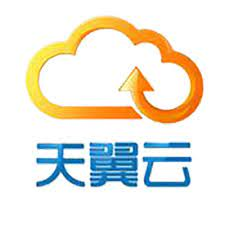

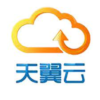

In [4]:
import torchvision.transforms as transforms
from PIL import Image

img_pil = Image.open("./images/tyy.jpg")
display(img_pil)

# 将较短的边 resize 到 100，另一边按比例缩放
img_resized = transforms.Resize(100)(img_pil)
display(img_resized)

#### 3.2.2 裁剪

torchvision.transforms 包中提供了几种用于裁剪图像的方法，例如 CenterCrop 和 RandomCrop。这些方法可以用于数据预处理和数据增强，通过裁剪图像来聚焦于图像的重要部分或增加模型的鲁棒性。

##### CenterCrop()

从输入图像的中心，裁剪指定大小的图像。在数据预处理阶段，可以用来切除图像边缘可能存在的无关信息。参数 size 可以是一个整数或一个元组(h, w)

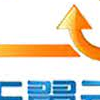

In [5]:
import torchvision.transforms as transforms
from PIL import Image

img_pil = Image.open("./images/tyy.jpg")
center = transforms.CenterCrop(100)(img_pil)
display(center)

##### RandomCrop()

从输入图像中随机裁剪指定大小的图像，用于数据增强，通过随机裁剪图像来提高模型的泛化能力。

```python
`RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')`
```
- 参数定义：
  - `size`：裁剪图像的大小，可以是一个整数（正方形图像）或一个元组 (h, w)。
  - `padding`：对图像进行填充的大小，可以是一个整数或一个元组 (top, bottom, left, right)。默认为 None。
  - `pad_if_needed`：如果为 True，则在图像的宽度或高度小于裁剪尺寸时进行填充。默认为 False。
  - `fill`：填充的颜色。默认为 0。
  - `padding_mode`：填充模式，可以是 'constant'（常数填充）、'edge'（边缘填充）、'reflect'（镜像填充）或 'symmetric'（对称填充）。默认为 'constant'。


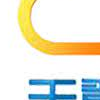

In [15]:
import torchvision.transforms as transforms
from PIL import Image

img_pil = Image.open("./images/tyy.jpg")

# 随机裁剪边长 100 的图片
img_cropped = transforms.RandomCrop(100)(img_pil)
display(img_cropped)


##### FiveCrop()

裁剪图像的五个子图像，用于数据增强，通过随机裁剪图像来提高模型的泛化能力。

```python
class torchvision.transforms.FiveCrop(size: Union[int, Tuple[int, int]]) -> None
```


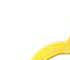

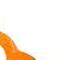

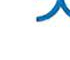

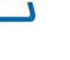

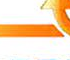

In [18]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

img_pil = Image.open("./images/tyy.jpg")
img_5_crop = transforms.FiveCrop(size=(60, 70))(img_pil)

for img in img_5_crop:
    display(img)




#### 3.2.3 翻转

##### RandomHorizontalFlip

以一定的概率水平翻转图像，适用于水平翻转不改变图像语义的任务（如分类、目标检测等）。只有当水平翻转不影响图像语义时，才适用此方法。


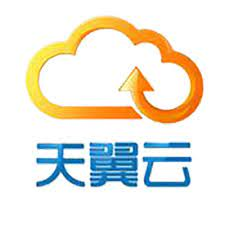

In [29]:
from PIL import Image
from torchvision import transforms

img_pil = Image.open("./images/tyy.jpg")
# 以 50% 的概率水平翻转图片
flipped = transforms.RandomHorizontalFlip(p=0.5)(img_pil)
display(flipped)

##### RandomVerticalFlip

与水平翻转类似，只有当垂直翻转不影响图像语义时，才适用此方法。

##### RandomRatation

以一定的概率随机旋转图像。

参数定义：

- `degrees` (sequence or float or int)：旋转角度范围。可以是一个数值，此时图像旋转范围为 `(-degrees, degrees)`。也可以是一个 `(min, max)` 形式的元组，此时图像旋转范围为 `(min, max)`。
- `resample` (bool, optional)：重采样方法。默认值为 None。可以是 PIL.Image.NEAREST、PIL.Image.BOX、PIL.Image.BILINEAR、PIL.Image.HAMMING、PIL.Image.BICUBIC 之一。
- `expand` (bool, optional)：是否扩展图像，以容纳完整的旋转后图像。默认值为 False。旋转可能导致图像边缘出现空白区域，可以通过设置 `expand=True` 来解决。
- `center` (2-tuple, optional)：旋转中心。默认值为图像中心。


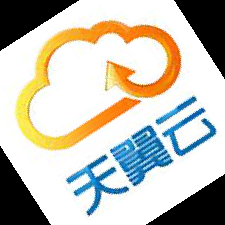

In [42]:
from torchvision import transforms
from PIL import Image

img_pil = Image.open("./images/tyy.jpg")
transform = transforms.RandomRotation(degrees=45, expand=False)
rotated = transform(img_pil)
display(rotated)




### 3.3 Tensor的变换

#### 3.3.1 Normalize 标准化

对输入 Tensor 进行标准化，即减去均值并除以标准差。为了保证数据集中所有的图像分布都相似，这样在训练的时候更容易收敛，既加快了训练速度，也提高了训练效果

```python
torchvision.transforms.Normalize(mean, std, inplace=False)
```

参数：
- mean：一个浮点数序列，表示每个通道的均值。
- std：一个浮点数序列，表示每个通道的标准差。
- inplace：布尔值，如果为 True，则在原 Tensor 上执行操作，而不是创建新的 Tensor。


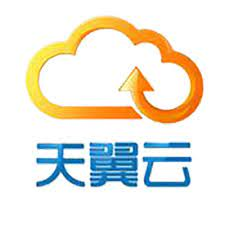

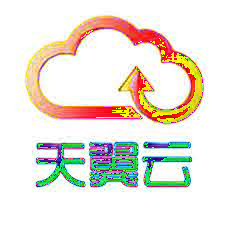

In [43]:
from torchvision import transforms
from PIL import Image

img_pil = Image.open("./images/tyy.jpg")
norm_oper = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

display(img_pil)
img_tensor = transforms.ToTensor()(img_pil)
tensor_norm = norm_oper(img_tensor)

img_norm = transforms.ToPILImage()(tensor_norm)
display(img_norm)




#### 3.3.2 随机选择图像区域擦除

```python
torchvision.transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
```

参数：
- p：执行擦除操作的概率。
- scale：擦除区域面积相对于输入图像的比例范围。
- ratio：擦除区域的长宽比范围。
- value：擦除区域的像素值，可以是一个数值或一个长度为通道数的元组。
- inplace：布尔值，如果为 True，则在原 Tensor 上执行操作，而不是创建新的 Tensor。


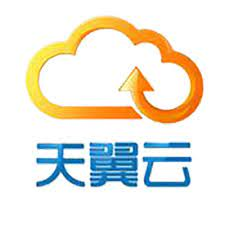

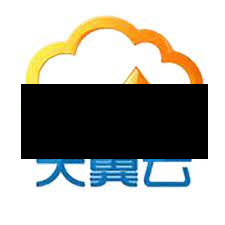

In [58]:
from PIL import Image
from torchvision import transforms

erase = transforms.RandomErasing(p=0.9, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0)
img_pil = Image.open("./images/tyy.jpg")
display(img_pil)
img_tensor = transforms.ToTensor()(img_pil)
tensor_erased = erase(img_tensor)
img_erased = transforms.ToPILImage()(tensor_erased)
display(img_erased)



#### 3.3.3 组合变换

为了方便使用，可以使用 `transforms.Compose` 将多个变换组合在一起。可以将 Compose 类结合 dataset 使用，赋值给 transform 参数，在读取数据的同时做各种转换。


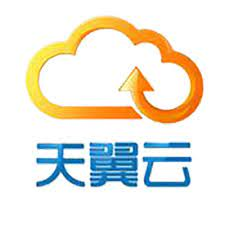

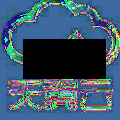

In [67]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize(150),
    transforms.CenterCrop(120),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0),
    transforms.ToPILImage()
])


img_pil = Image.open("./images/tyy.jpg")
display(img_pil)
img_transfomred = transform(img_pil)
display(img_transfomred)


## 4 网络模型

### 4.1 torchvision.models 模块

`torchvision.models` 包含了许多经典的预训练深度学习模型，这些模型在计算机视觉领域有着广泛的应用。`torchvision.models` 的主要功能有：

1. 提供预训练模型：`torchvision.models` 提供了许多在大规模数据集（如 ImageNet）上预训练过的深度学习模型。这些预训练模型可以很容易地用于迁移学习，从而快速获得较好的性能，减少训练时间。

2. 提供各种网络架构：`torchvision.models` 包含了许多不同类型的深度学习模型，例如卷积神经网络（CNN）、生成对抗网络（GAN）、循环神经网络（RNN）等。这为研究人员和开发者提供了多样化的选择。

3. 便于开发和研究：`torchvision.models` 的代码实现高质量，易于理解和修改。这使得开发者和研究人员可以在这些模型的基础上进行进一步的开发和研究。

`torchvision.models` 提供的主要模块有：

1. 分类模型：包括 AlexNet、VGG、ResNet、DenseNet、MobileNet 等。这些模型在图像分类任务中表现出色。

2. 目标检测和实例分割模型：包括 Faster R-CNN、Mask R-CNN 等。这些模型在目标检测和实例分割任务中有着广泛的应用。

3. 语义分割模型：包括 FCN、DeepLab 等。这些模型在语义分割任务中取得了很好的效果。

4. 生成模型：包括 DCGAN、Pix2Pix 等。这些模型在图像生成、图像到图像的翻译任务中有着广泛的应用。

5. 关键点检测和姿态估计模型：包括 Keypoint R-CNN 等。这些模型在关键点检测和姿态估计任务中表现出色。

6. 视觉变换模型：包括 Spatial Transformer Networks 等。这些模型可以学习图像的空间变换，用于各种计算机视觉任务。

`torchvision.models` 为计算机视觉任务提供了丰富的预训练模型和各种网络架构。这有助于研究人员和开发者更快地实现高性能的视觉应用。

### 4.2 实例化网络模型

这里以实例化 GoogLeNet 为例。GoogLeNet 是一种卷积神经网络（CNN）架构，由 Christian Szegedy 等人在 2014 年的论文 [Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842) 中提出。该网络在 2014 年的 ImageNet 大规模视觉识别挑战赛（ILSVRC）中获得了冠军。GoogLeNet 的主要特点是引入了一种称为 Inception 模块的结构，该结构允许网络在不同尺度上捕捉图像特征。这使得 GoogLeNet 在参数数量和计算复杂度相对较低的情况下，仍能取得很好的性能。

GoogLeNet 的主要作用和功能：

1. 图像分类：GoogLeNet 的主要应用是图像分类任务。由于其优秀的性能和相对较低的复杂度，GoogLeNet 常被用作计算机视觉任务的基线模型。

2. 特征提取：GoogLeNet 可以用作特征提取器，将图像映射到一个具有丰富表示能力的特征空间。这些特征可用于其他计算机视觉任务，如物体检测、语义分割等。

3. 迁移学习：GoogLeNet 的预训练模型可以用于迁移学习。通过在预训练模型的基础上进行微调，可以在新的任务上取得较好的性能，减少训练时间。

下面是一个使用 PyTorch 和 torchvision 实例化一个预训练的 GoogLeNet 网络并应用它的例子。这个例子中，我们首先实例化了一个预训练的 GoogLeNet 模型，并将其设置为评估模式。然后，我们加载一张图像，对其进行预处理并将其转换为张量。接下来，我们创建一个输入批量并将其传递给模型。最后，我们计算输出概率并找到预测的类别索引。


In [10]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

googlenet = models.googlenet(pretrained=True)

googlenet.eval()

input_img = Image.open("./images/tyy.jpg")
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = preprocess(input_img)

input_batch = input_tensor.unsqueeze(0)
with torch.no_grad():
    output = googlenet(input_batch)

probabilities = torch.nn.functional.softmax(output[0], dim=0)
predicted_class_idx = torch.argmax(probabilities).item()

print("Predicted class index:", predicted_class_idx)

Predicted class index: 902


### 4.3 模型微调

深度学习中的微调（Fine-tuning）是一种迁移学习（Transfer Learning）方法，它的动机在于利用预训练模型的知识来加速并提高模型在新任务上的表现。预训练模型通常在大型数据集（如 ImageNet）上训练，具有很好的特征提取能力。通过微调，我们可以在新任务的目标数据集上，对预训练模型进行少量的训练，使其适应新任务，而无需从头开始训练模型。这样可以节省大量的时间和计算资源。

微调的好处：

1. 训练速度快：由于模型已经在大型数据集上预先训练过，因此只需要在较小的目标数据集上进行微调，大大缩短了训练时间。
2. 需要较少的训练数据：微调使得在较小的数据集上也能实现很好的性能，这对于一些数据稀缺的领域或任务非常有用。
3. 泛化性能好：预训练模型在大型数据集上学到的特征具有很好的泛化性能，因此微调后的模型通常具有较好的性能。

下面是一个对 `torchvision.models` 包中的 GoogLeNet 进行微调的示例：

In [18]:
import torch
import torchvision.models as models

googlenet = models.googlenet(pretrained=True)

fc_in_features = googlenet.fc.in_features
print("fc_in_features: ", fc_in_features)

fc_out_features = googlenet.fc.out_features
print("fc_out_features: ", fc_out_features)

googlenet.fc = torch.nn.Linear(fc_in_features, 10)

fc_in_features:  1024
fc_out_features:  1000


这段代码主要做了以下几件事：

1. 导入 PyTorch 和 PyTorch 自带的预训练模型库（`torchvision.models`）。

```python
import torch
import torchvision.models as models
```

2. 加载预训练的 GoogLeNet 模型。

```python
googlenet = models.googlenet(pretrained=True)
```

3. 获取 GoogLeNet 模型中全连接层（fully connected layer，即 `fc` 层）的输入特征数（`in_features`）并打印。

```python
fc_in_features = googlenet.fc.in_features
print("fc_in_features: ", fc_in_features)
```
这里，`fc_in_features` 表示全连接层的输入节点数。对于 GoogLeNet，其全连接层的输入特征数为 1024。

4. 获取 GoogLeNet 模型中全连接层的输出特征数（`out_features`）并打印。

```python
fc_out_features = googlenet.fc.out_features
print("fc_out_features: ", fc_out_features)
```
这里，`fc_out_features` 表示全连接层的输出节点数。对于预训练的 GoogLeNet，其全连接层的输出特征数为 1000，因为它是在 1000 类 ImageNet 数据集上进行的预训练。

5. 修改 GoogLeNet 模型的全连接层，将其输出特征数更改为 10。

```python
googlenet.fc = torch.nn.Linear(fc_in_features, 10)
```
这里，我们用一个新的全连接层替换了原来的全连接层，新的全连接层的输入特征数（`fc_in_features`）保持不变，输出特征数设置为 10，这意味着我们希望将这个模型用于一个具有 10 个类别的分类任务。此时，我们需要对这个修改后的模型进行微调，以适应新的任务。

总之，这段代码首先加载了预训练的 GoogLeNet 模型，然后获取并打印了全连接层的输入和输出特征数，最后将全连接层的输出特征数修改为 10，以适应一个具有 10 个类别的分类任务。